In [2]:
#csv파일을 판다스의 read_csv() 함수로 데이터 프레임을 변환한다음 head()메서드로 행을 출력

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

print(pd.unique(fish['Species'])) #판다스의 unique()함수를 이용하여 species열에서 고유한 값을 추출

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() #speices의 열을 타깃으로 만들고 나머지 열은 입력데이터로 변환

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
fish_target = fish['Species'].to_numpy() #추출한 species를 타깃으로 변환(넘파이배열 이용)

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42) # train data와 test data로 스까준다

In [6]:
from sklearn.preprocessing import StandardScaler # standardscaler 클래스를 사용해 훈련세트와 테스트세트를 표준화 전처리 해준다

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [7]:
from sklearn.neighbors import KNeighborsClassifier #2장에서 했던 것처럼 사이킷런의 KNeighborsClassifier로 만들고 훈련세트로 모델을 훈련한다음 스코어 확인

kn = KNeighborsClassifier(n_neighbors=3) #최근점 이웃의 개수인 k를 3으로 설정 (n_neighbors = k)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

0.8907563025210085
0.85
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


타깃데이터에 2개 이상의 클래스가 포함된 문제를 다중분류(multi-classsclassification)라고 한다.
<br><Br>
이진분류와 모델을 훈련하는 방식은 동일하지만 이진분류는 양성 클래스와 음성 클래스를 각 1과 0으로 지정하여 타깃 데이터를 만들었다.
다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 편리하게 문자열로 된 타깃값을 그대로 사용할 수 있다.
<br><br>
이때 주의할점은 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다. 따라서 아까 출력했던 pd.unique(fish['species'])로 출력했던 순서와는 다르다.
KNeighborsclassifier에서 정렬된 타깃값은 classes_속성에 저장되어있다.(print(kn.classes_) )

In [8]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [9]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])  #메서드별로 클래스의 확률을 구함
print(np.round(proba, decimals=4)) #기본은 소수점 첫번째에서 반올림하지만 decimals 매개변수로 소수점 아래 자릿수를 지정할 수 있다.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']<br>
[[0.     0.     1.     0.     0.     0.     0.    ]<br>
 [0.     0.     0.     0.     0.     1.     0.    ]<br>
 [0.     0.     0.     1.     0.     0.     0.    ]<br>
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]<br>
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

In [10]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


-로지스틱 회귀(Logistic Regression)는 이름은 회귀지만 분류 모델입니다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습합니다.
<br><br>
z = a * (weight,무게) + b * (lenght,길이) + c * (Diagonal,대각선) + d * (height,높이) + e * (width,두깨) + f 
<Br>a,b,c,d,e는 가중치 혹은 계수입니다.
<br><br>

-시그모이드 함수(sigmoid function) 또는 로지스틱 함수(logistic function)
<br>
시그모이드 함수는 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다 이로인해 z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고 z가 무한하게 큰 양수가 될 때는 1에 가까워진다.
z가 0이 될때는 0.5가 된다

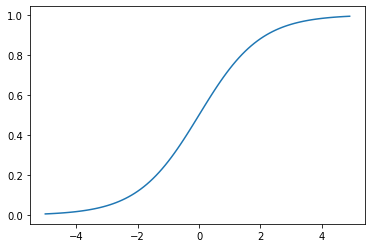

In [11]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

-불리언 인덱싱(Boolean Indexing)
넘파이 배열은 True, False값을 전달하여 행을 선택할 수 있다.<br>
다음과같이 a에서 e까지 5개의 원소로 이루어진 배열에서 a와 c만 골라내려면 첫번째와 세번째 원소만 True이고 나머지 원소는 모두 False인 배열을 전달하면 된다.

In [12]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [23]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') #bream_smelt_indexes에 Bream과 Smelt가 있는 행을 True로 바꿔 인데스를 구한다
train_bream_smelt = train_scaled[bream_smelt_indexes] #train_scaled에 위에서 구한 Bream과 Smelt가 True인 것들을 넣어준다
target_bream_smelt = train_target[bream_smelt_indexes] #타깃도 마찬가지

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt) #로지스틱 회귀를 이용하여 위에서 구한 Bream과 Smelt가 True인것들을 학습시킨다

print(lr.predict(train_bream_smelt[:5])) #0~4번 배열의 값으로 예측을 해본다

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
print(lr.predict_proba(train_bream_smelt[:5])) #predict_proba 함수로 0~4번 배열의 값의 예측확률을 볼수있다. , 첫번째 행이 음수클래스(0), 두번째 행이 양수클래스(1)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [25]:
print(lr.classes_) #타깃값을 알파벳 순으로 정렬한것을 재차확인, Bream가 음수, Smelt가 양수클래스인것을 확인했다.

['Bream' 'Smelt']


In [26]:
print(lr.coef_, lr.intercept_) #계수,가중치 / 절편 출력

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [27]:
decisions = lr.decision_function(train_bream_smelt[:5]) #decision_function()메서드로 z의 값을 출력할수 있다.
print(decisions) 

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [28]:
from scipy.special import expit

print(expit(decisions))#시그모이드 함수 적용

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


방금까진 로지스틱 회귀 이진분류 방법임 다음부턴 로지스틱 회귀 다중분류 방법임

In [38]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [39]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [40]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [41]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [42]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [43]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [44]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
